In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns

In [40]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


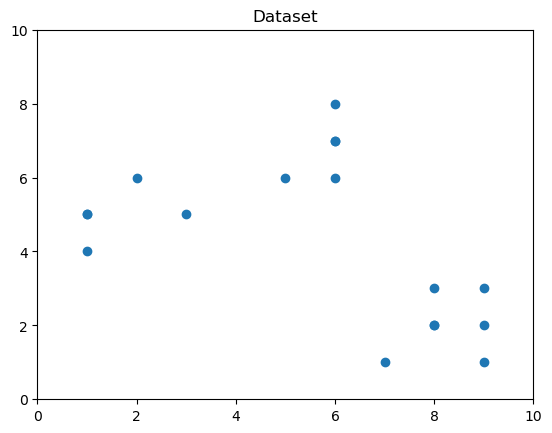

In [41]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
  

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [4]:
print(X)

[[3 5]
 [1 4]
 [1 5]
 [2 6]
 [1 5]
 [6 8]
 [6 6]
 [6 7]
 [5 6]
 [6 7]
 [7 1]
 [8 2]
 [9 1]
 [8 2]
 [9 3]
 [9 2]
 [8 3]]


# Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [8]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\NAVNEET03\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NAVNEET03\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.7587138847606585
5 : 0.6872918402957646
6 : 0.5808803063754726
7 : 0.5078332340512092
8 : 0.4442520441076937
9 : 0.3333333333333333


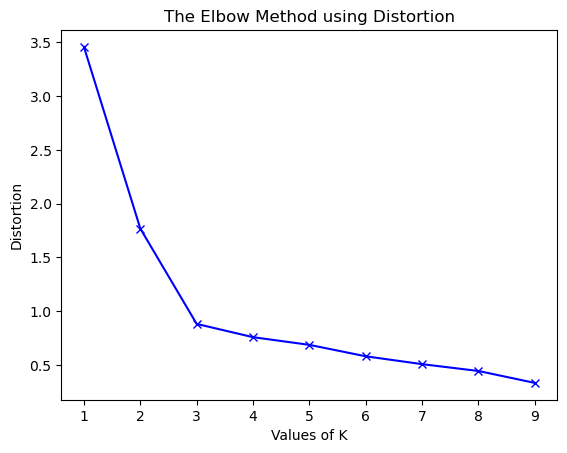

In [10]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [11]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 217.64705882352942
2 : 68.42857142857143
3 : 16.228571428571428
4 : 12.695238095238096
5 : 9.600000000000001
6 : 7.166666666666667
7 : 6.000000000000001
8 : 4.166666666666667
9 : 2.8333333333333335


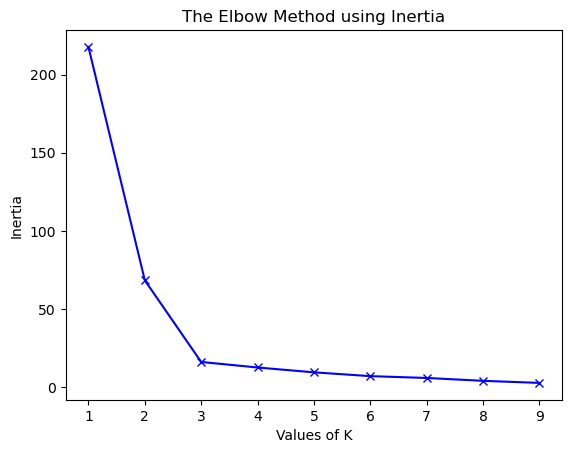

In [12]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# KMeans Graph

In [5]:
df = pd.DataFrame(data = X , columns = ['x','y'])

In [6]:
df.head()

,x,y
0,3,5
1,1,4
2,1,5
3,2,6
4,1,5


In [14]:
kmeans = KMeans(n_clusters = 3)
kmodel = kmeans.fit(X)

In [16]:
kmodel1 = kmeans.predict(X)
print(kmodel1)

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0 0 0]


In [17]:
s = pd.Series(kmodel1)

In [18]:
df['Predict'] = s.values
df.head()

,x,y,Predict
0,3,5,1
1,1,4,1
2,1,5,1
3,2,6,1
4,1,5,1


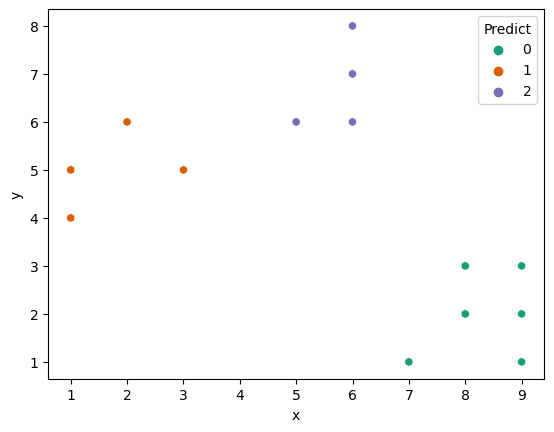

In [24]:
sns.scatterplot(x="x", y="y", hue="Predict", data=df, palette="Dark2")
plt.show()

# Principal Component Analysis

In [26]:
df1 = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
X = df1.iloc[:,0:4]
Y = df1.iloc[:,4]

In [30]:
#Preprocessing

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [31]:
#Covariance Matrix

features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [32]:
#Eigendecomposition

values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [43]:
2.93/4


0.7325

In [33]:
vectors[:5]

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [35]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.7277045209380131, 0.23030523267680664, 0.036838319576273926, 0.005151926808906289]


In [39]:
y = df1.iloc[:,4]

projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa
